In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Resonator 1

11.077

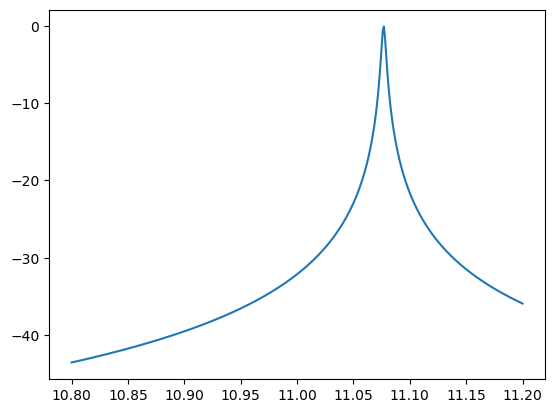

In [2]:
data1 = np.loadtxt('Simulation results/Resonator 1 - S21 dB.txt').T

plt.plot(data1[0],data1[1])
x_max = data1[0][np.argmax(data1[1])]
x_max

# Resonator 2

11.074949899799599

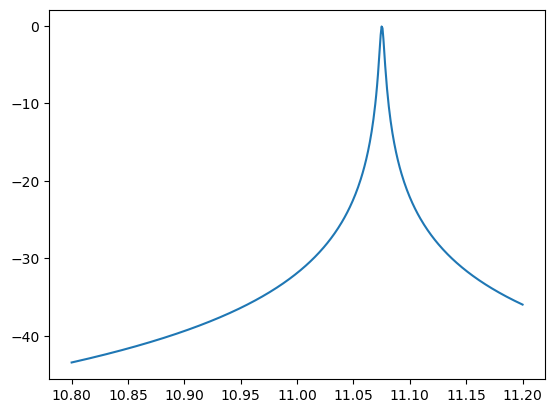

In [3]:
data2 = np.loadtxt('Simulation results/Resonator 2 - S21 dB.txt').T

plt.plot(data2[0],data2[1])
x_max = data2[0][np.argmax(data2[1])]
x_max

# Resonator 3

11.075751503006012

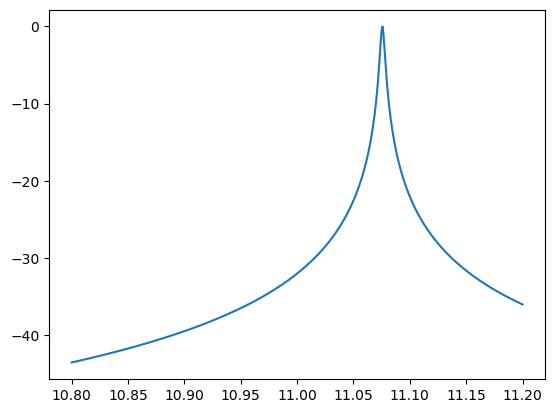

In [4]:
data3 = np.loadtxt('Simulation results/Resonator 3 - S21 dB.txt').T

plt.plot(data3[0],data3[1])
x_max = data3[0][np.argmax(data3[1])]
x_max

# Hopping rate

In [78]:
f_ghz=11.115 # GHz
f=f_ghz*1e9 # Hz
C=6.8e-15 #F
l= (10.3+0.026)*1e-3 # m
C_l=1.73e-10 # F/m
Z=50

t= -(1/2 * f*C*2/(C_l*l))*1e-9
t_teste = -0.042
t

-0.04230972045423249

# Eigenvalues

In [7]:
indexes = [(0,1),(1,2),(2,3),(3,4),(0,4),(1,0),(2,1),(3,2),(4,3),(4,0)]

ALG = np.zeros((5,5))
i = 0

for i in range(0,10):
    ALG[indexes[i][0]][indexes[i][1]] = 1

ALG


array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 0., 1., 0.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.]])

In [8]:
# list of eigenvalues

ev = np.sort(np.linalg.eigvals(ALG))
ev

array([-1.61803399, -1.61803399,  0.61803399,  0.61803399,  2.        ])

In [79]:
# Expeted frequencies

diagonal = f_ghz*np.ones(5)
H = -t*ALG
np.fill_diagonal(H,diagonal)

eigenv = np.sort(np.linalg.eigvals(H))
print(H,'\n\n', eigenv)

[[11.115       0.04230972  0.          0.          0.04230972]
 [ 0.04230972 11.115       0.04230972  0.          0.        ]
 [ 0.          0.04230972 11.115       0.04230972  0.        ]
 [ 0.          0.          0.04230972 11.115       0.04230972]
 [ 0.04230972  0.          0.          0.04230972 11.115     ]] 

 [11.04654143 11.04654143 11.14114885 11.14114885 11.19961944]


# Lattice

In [84]:
S31 = np.loadtxt('Simulation results/Lattice S31 dB.txt').T
S41 = np.loadtxt('Simulation results/Lattice S41 dB.txt').T
S43 = np.loadtxt('Simulation results/Lattice S43 dB.txt').T

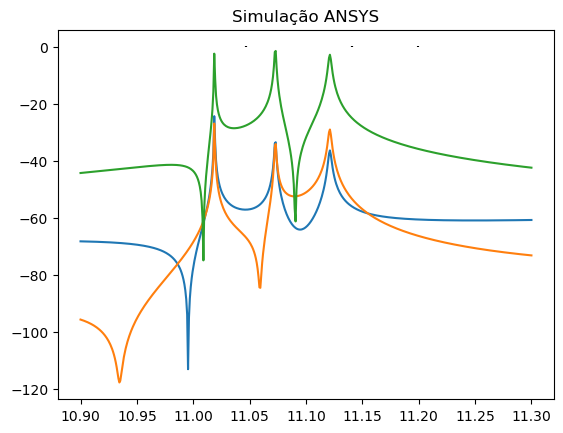

In [88]:
plt.plot(S31[0],S31[1])
plt.plot(S41[0],S41[1])
plt.plot(S43[0],S43[1])
plt.title('Simulação ANSYS')

#eigvalues = [eigenv[0],eigenv[2],eigenv[4]]
plt.vlines(eigenv,0,0.06, colors='black')

# Analizando a medida experimental

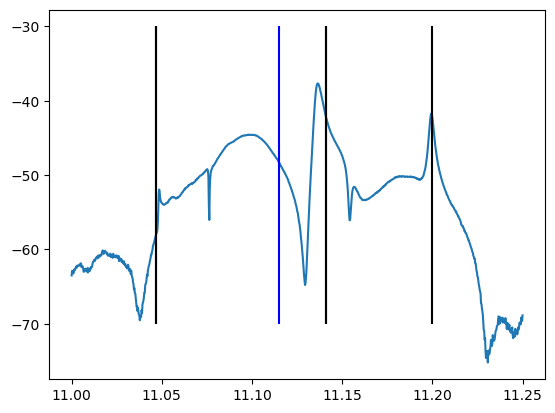

In [81]:
result = np.loadtxt('Modos coletivos de onda completa_-5dBm.txt')

plt.plot(result[0],result[1])
plt.vlines(eigenv,-30,-70, colors='black')
plt.vlines(f_ghz, -30,-70, colors='blue')

In [86]:
11.115/2

5.5575